In [101]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
# 1.理解预测目标，根据乘客信息，预测乘客幸存的可能性
train=pd.read_csv('../data/train.csv')
test=pd.read_csv('../data/test.csv')
PassengerId=test['PassengerId']
all_data = pd.concat([train, test], ignore_index = True)
# 2.分析数据：包括数据清洗(特征值为null),数据分析(每个特征和幸存的关系)
# 查看数据
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [15]:
# 首先通过info()方法查看数据特征为null的情况
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


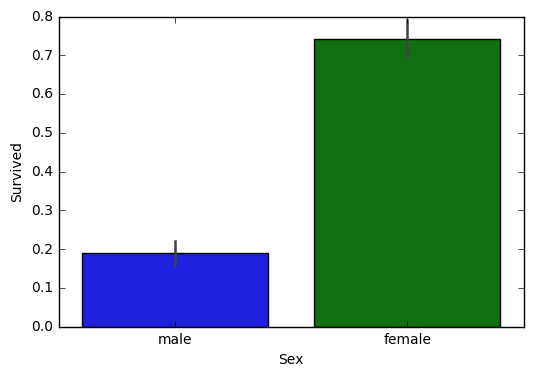

In [29]:
# 数据分析：特征工程
# 1.Sex Feature：性别特征：女性幸存几率大于男性
sns.barplot(x="Sex", y="Survived", data=train)
plt.show()

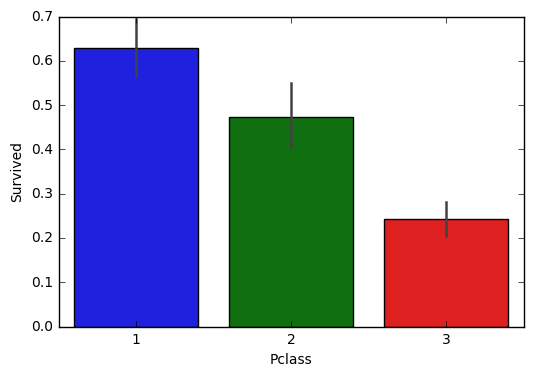

In [31]:
# 2.Pclass Feature：客舱等级特征：等级越高幸存几率越大
sns.barplot(x="Pclass", y="Survived", data=train)
plt.show()

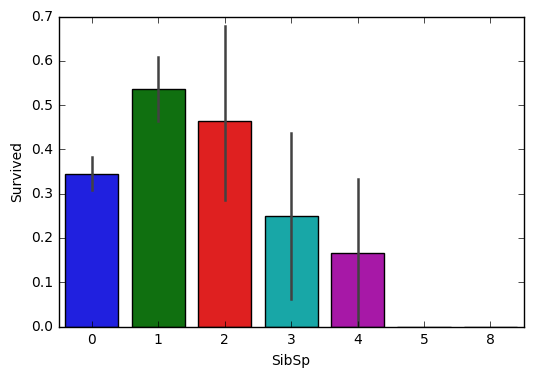

In [33]:
# 3.SibSp Feature：配偶及兄弟姐妹数适中的乘客幸存率更高
sns.barplot(x="SibSp", y="Survived", data=train)
plt.show()

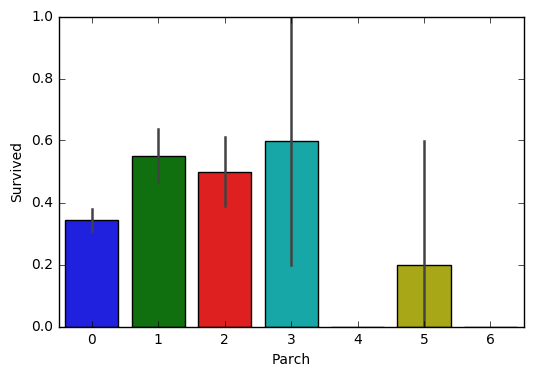

In [10]:
# 4.Parch Feature：父母与子女数适中的乘客幸存率更高
sns.barplot(x="Parch", y="Survived", data=train)
plt.show()

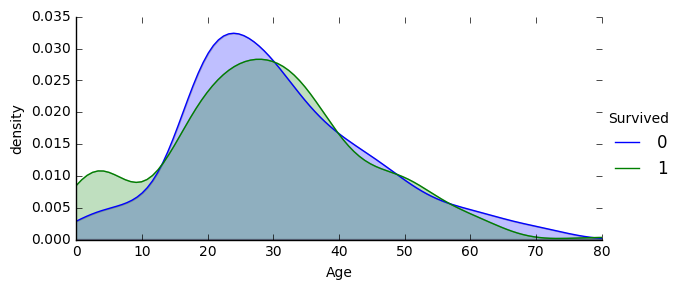

In [7]:
# 5.Age Feature：从不同生还情况的密度图可以看出，在年龄15岁的左侧，生还率有明显差别，
# 密度图非交叉区域面积非常大，但在其他年龄段，则差别不是很明显，认为是随机所致，
# 因此可以考虑将此年龄偏小的区域分离出来。
facet = sns.FacetGrid(train, hue="Survived", aspect=2)
facet.map(sns.kdeplot, 'Age', shade=True)
facet.set(xlim=(0, train['Age'].max()))
facet.add_legend()
plt.xlabel('Age')
plt.ylabel('density')
plt.show()

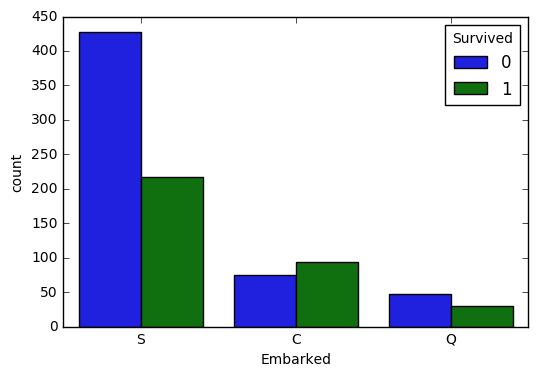

In [11]:
# 6.Embarked登港港口与生存情况的分析
# 结果分析:C地的生存率更高,这个也应该保留为模型特征.
sns.countplot('Embarked',hue='Survived',data=train)
plt.show()

In [102]:
# 7.Title Feature(New)：不同称呼的乘客幸存率不同
# 新增Title特征，从姓名中提取乘客的称呼，归纳为六类。
all_data['Title'] = all_data['Name'].apply(lambda x:x.split(',')[1].split('.')[0].strip())
all_data['Title'].value_counts()

Mr              757
Miss            260
Mrs             197
Master           61
Dr                8
Rev               8
Col               4
Mlle              2
Ms                2
Major             2
Capt              1
Sir               1
the Countess      1
Dona              1
Jonkheer          1
Don               1
Lady              1
Mme               1
Name: Title, dtype: int64

In [71]:
Title_Dict = {}
Title_Dict.update(dict.fromkeys(['Capt', 'Col', 'Major', 'Dr', 'Rev'], 'Officer'))
Title_Dict.update(dict.fromkeys(['Don', 'Sir', 'the Countess', 'Dona', 'Lady'], 'Royalty'))
Title_Dict.update(dict.fromkeys(['Mme', 'Ms', 'Mrs'], 'Mrs'))
Title_Dict.update(dict.fromkeys(['Mlle', 'Miss'], 'Miss'))
Title_Dict.update(dict.fromkeys(['Mr'], 'Mr'))
Title_Dict.update(dict.fromkeys(['Master','Jonkheer'], 'Master'))
Title_Dict

{'Capt': 'Officer',
 'Col': 'Officer',
 'Don': 'Royalty',
 'Dona': 'Royalty',
 'Dr': 'Officer',
 'Jonkheer': 'Master',
 'Lady': 'Royalty',
 'Major': 'Officer',
 'Master': 'Master',
 'Miss': 'Miss',
 'Mlle': 'Miss',
 'Mme': 'Mrs',
 'Mr': 'Mr',
 'Mrs': 'Mrs',
 'Ms': 'Mrs',
 'Rev': 'Officer',
 'Sir': 'Royalty',
 'the Countess': 'Royalty'}

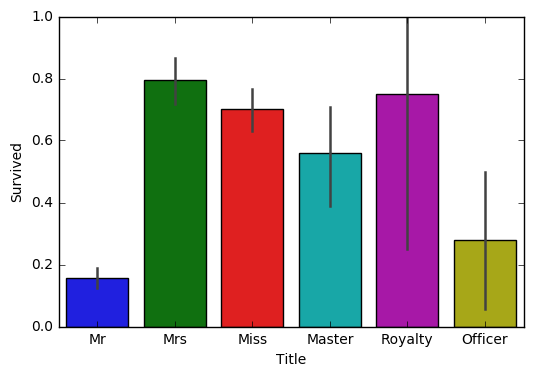

In [72]:
all_data['Title'] = all_data['Title'].map(Title_Dict)
sns.barplot(x="Title", y="Survived", data=all_data)
plt.show()

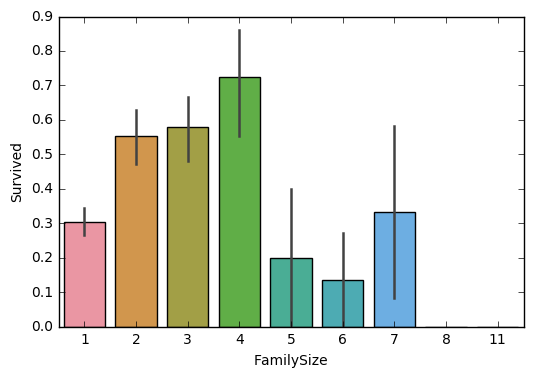

In [46]:
# 8.FamilyLabel Feature(New)：家庭人数为2到4的乘客幸存率较高
# 新增FamilyLabel特征，先计算FamilySize=Parch+SibSp+1，然后把FamilySize分为三类。
all_data['FamilySize']=all_data['SibSp']+all_data['Parch']+1
sns.barplot(x="FamilySize", y="Survived", data=all_data)
plt.show()

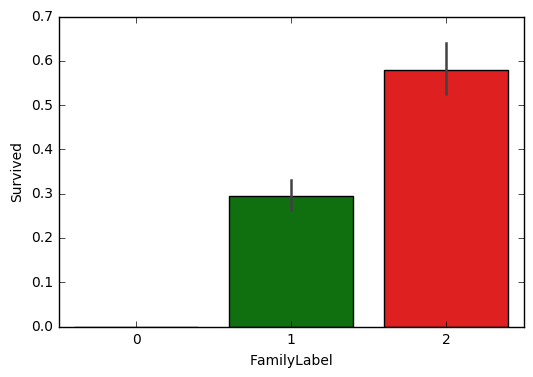

In [49]:
# 按生存率把FamilySize分为三类，构成FamilyLabel特征。
def Fam_label(s):
    if (s >= 2) & (s <= 4):
        return 2
    elif ((s > 4) & (s <= 7)) | (s == 1):
        return 1
    elif (s > 7):
        return 0
all_data['FamilyLabel']=all_data['FamilySize'].apply(Fam_label)
sns.barplot(x="FamilyLabel", y="Survived", data=all_data)
plt.show()

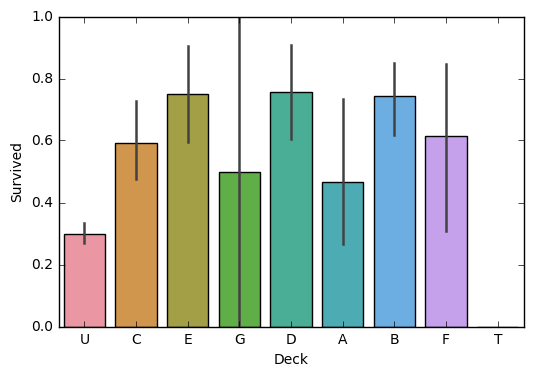

In [51]:
# 9.Deck Feature(New)：不同甲板的乘客幸存率不同
# 新增Deck特征，先把Cabin空缺值填充为'Unknown'，再提取Cabin中的首字母构成乘客的甲板号。
all_data['Cabin'] = all_data['Cabin'].fillna('Unknown')
all_data['Deck']=all_data['Cabin'].str.get(0)
sns.barplot(x="Deck", y="Survived", data=all_data)
plt.show()

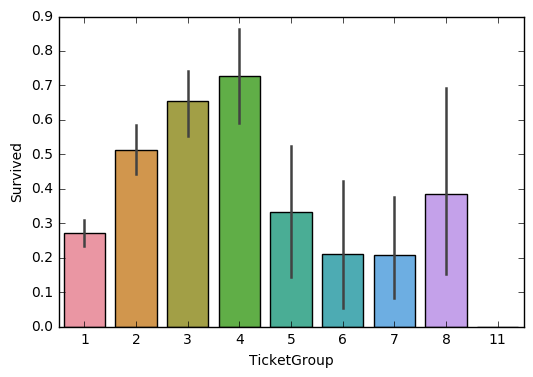

In [62]:
# 10.TicketGroup Feature(New)：与2至4人共票号的乘客幸存率较高
# 新增TicketGroup特征，统计每个乘客的共票号数。
# 统计每种票的个数
Ticket_Count = dict(all_data['Ticket'].value_counts())
# 计算相同个数出现的次数
all_data['TicketGroup'] = all_data['Ticket'].apply(lambda x:Ticket_Count[x])
sns.barplot(x='TicketGroup', y='Survived', data=all_data)
plt.show()

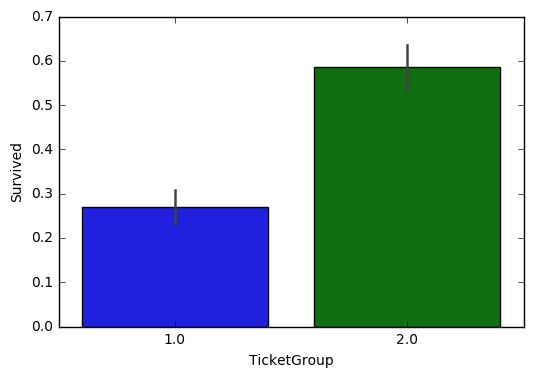

In [65]:
# 按生存率把TicketGroup分为三类。
def Ticket_Label(s):
    if (s >= 2) & (s <= 4):
        return 2
    elif ((s > 4) & (s <= 8)) | (s == 1):
        return 1
    elif (s > 8):
        return 0

all_data['TicketGroup'] = all_data['TicketGroup'].apply(Ticket_Label)
sns.barplot(x='TicketGroup', y='Survived', data=all_data)
plt.show()

In [103]:
# 数据清洗
# 1.缺失值填充
# Age Feature：Age缺失量为263，缺失量较大，用Sex, Title, Pclass三个特征构建随机森林模型，填充年龄缺失值。
from sklearn.ensemble import RandomForestRegressor
age_df = all_data[['Age', 'Pclass','Sex','Title']]
# age_df
age_df=pd.get_dummies(age_df)
# age_df
known_age = age_df[age_df.Age.notnull()].as_matrix()
unknown_age = age_df[age_df.Age.isnull()].as_matrix()
# known_age
# 第一列：年龄 因变量
y = known_age[:, 0]
# y
# 年龄外的特征 自变量
X = known_age[:, 1:]
# X
rfr = RandomForestRegressor(random_state=0, n_estimators=100, n_jobs=-1)
rfr.fit(X, y)
predictedAges = rfr.predict(unknown_age[:, 1::])
all_data.loc[ (all_data.Age.isnull()), 'Age' ] = predictedAges 
all_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 13 columns):
Age            1309 non-null float64
Cabin          295 non-null object
Embarked       1307 non-null object
Fare           1308 non-null float64
Name           1309 non-null object
Parch          1309 non-null int64
PassengerId    1309 non-null int64
Pclass         1309 non-null int64
Sex            1309 non-null object
SibSp          1309 non-null int64
Survived       891 non-null float64
Ticket         1309 non-null object
Title          1309 non-null object
dtypes: float64(3), int64(4), object(6)
memory usage: 133.0+ KB


In [105]:
# Embarked Feature：Embarked缺失量为2，缺失Embarked信息的乘客的Pclass均为1，且Fare均为80，
# 因为Embarked为C且Pclass为1的乘客的Fare中位数为80，所以缺失值填充为C。
all_data[all_data['Embarked'].isnull()]

,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket,Title
61,38.0,B28,NaN,80.0,"Icard, Miss. Amelie",0,62,1,female,0,1.0,113572,Miss
829,62.0,B28,NaN,80.0,"Stone, Mrs. George Nelson (Martha Evelyn)",0,830,1,female,0,1.0,113572,Mrs


In [107]:
all_data.groupby(by=["Pclass","Embarked"]).Fare.median()

Pclass  Embarked
1       C           76.7292
        Q           90.0000
        S           52.0000
2       C           15.3146
        Q           12.3500
        S           15.3750
3       C            7.8958
        Q            7.7500
        S            8.0500
Name: Fare, dtype: float64

In [110]:
all_data['Embarked'] = all_data['Embarked'].fillna('C')
all_data[all_data['Embarked'].isnull()]

,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket,Title


In [112]:
# Fare Feature：Fare缺失量为1，缺失Fare信息的乘客的Embarked为S，Pclass为3，
# 所以用Embarked为S，Pclass为3的乘客的Fare中位数填充。
all_data[all_data['Fare'].isnull()]

,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket,Title
1043,60.5,NaN,S,NaN,"Storey, Mr. Thomas",0,1044,3,male,0,NaN,3701,Mr


In [114]:
fare=all_data[(all_data['Embarked'] == "S") & (all_data['Pclass'] == 3)].Fare.median()
all_data['Fare']=all_data['Fare'].fillna(fare)
all_data[all_data['Fare'].isnull()]

,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket,Title


In [129]:
# 2.同组识别
# 把姓氏相同的乘客划分为同一组，从人数大于一的组中分别提取出每组的妇女儿童和成年男性。
all_data['Surname']=all_data['Name'].apply(lambda x:x.split(',')[0].strip())
Surname_Count = dict(all_data['Surname'].value_counts())
all_data['FamilyGroup'] = all_data['Surname'].apply(lambda x:Surname_Count[x])
Female_Child_Group=all_data.loc[(all_data['FamilyGroup']>=2) & ((all_data['Age']<=12) | (all_data['Sex']=='female'))]
Male_Adult_Group=all_data.loc[(all_data['FamilyGroup']>=2) & (all_data['Age']>12) & (all_data['Sex']=='male')]
Male_Adult_Group

,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket,Title,Surname,FamilyGroup
0,22.000000,NaN,S,7.2500,"Braund, Mr. Owen Harris",0,1,3,male,1,0.0,A/5 21171,Mr,Braund,2
4,35.000000,NaN,S,8.0500,"Allen, Mr. William Henry",0,5,3,male,0,0.0,373450,Mr,Allen,2
5,28.226256,NaN,Q,8.4583,"Moran, Mr. James",0,6,3,male,0,0.0,330877,Mr,Moran,3
6,54.000000,E46,S,51.8625,"McCarthy, Mr. Timothy J",0,7,1,male,0,0.0,17463,Mr,McCarthy,2
13,39.000000,NaN,S,31.2750,"Andersson, Mr. Anders Johan",5,14,3,male,1,0.0,347082,Mr,Andersson,11
17,32.535641,NaN,S,13.0000,"Williams, Mr. Charles Eugene",0,18,2,male,0,1.0,244373,Mr,Williams,5
27,19.000000,C23 C25 C27,S,263.0000,"Fortune, Mr. Charles Alexander",2,28,1,male,3,0.0,19950,Mr,Fortune,6
34,28.000000,NaN,C,82.1708,"Meyer, Mr. Edgar Joseph",0,35,1,male,1,0.0,PC 17604,Mr,Meyer,3
35,42.000000,NaN,S,52.0000,"Holverson, Mr. Alexander Oskar",0,36,1,male,1,0.0,113789,Mr,Holverson,2
45,28.226256,NaN,S,8.0500,"Rogers, Mr. William John",0,46,3,male,0,0.0,S.C./A.4. 23567,Mr,Rogers,2


In [130]:
# 发现绝大部分女性和儿童组的平均存活率都为1或0，即同组的女性和儿童要么全部幸存，要么全部遇难。
Female_Child=pd.DataFrame(Female_Child_Group.groupby('Surname')['Survived'].mean().value_counts())
Female_Child.columns=['GroupCount']
Female_Child

,GroupCount
1.000000,115
0.000000,31
0.750000,2
0.333333,1
0.142857,1


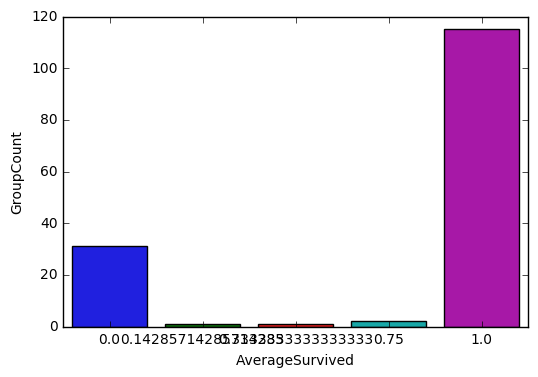

In [131]:
sns.barplot(x=Female_Child.index, y=Female_Child["GroupCount"]).set_xlabel('AverageSurvived')
plt.show()

In [132]:
# 绝大部分成年男性组的平均存活率也为1或0。
Male_Adult=pd.DataFrame(Male_Adult_Group.groupby('Surname')['Survived'].mean().value_counts())
Male_Adult.columns=['GroupCount']
Male_Adult

,GroupCount
0.000000,122
1.000000,20
0.500000,6
0.333333,2
0.250000,1


In [133]:
# 因为普遍规律是女性和儿童幸存率高，成年男性幸存较低，
# 所以我们把不符合普遍规律的反常组选出来单独处理。
# 把女性和儿童组中幸存率为0的组设置为遇难组，
# 把成年男性组中存活率为1的设置为幸存组，
# 推测处于遇难组的女性和儿童幸存的可能性较低，
# 处于幸存组的成年男性幸存的可能性较高。
Female_Child_Group=Female_Child_Group.groupby('Surname')['Survived'].mean()
Dead_List=set(Female_Child_Group[Female_Child_Group.apply(lambda x:x==0)].index)
print(Dead_List)
Male_Adult_List=Male_Adult_Group.groupby('Surname')['Survived'].mean()
Survived_List=set(Male_Adult_List[Male_Adult_List.apply(lambda x:x==1)].index)
print(Survived_List)

{'Olsson', 'Palsson', 'Ford', 'Sage', 'Jussila', 'Johnston', 'Arnold-Franchi', 'Ilmakangas', 'Lahtinen', 'Rice', 'Danbom', 'Oreskovic', 'Robins', 'Rosblom', 'Barbara', 'Turpin', 'Skoog', 'Attalah', 'Lobb', 'Goodwin', 'Boulos', 'Canavan', 'Caram', 'Panula', 'Lefebre', 'Vander Planke', 'Bourke', 'Cacic', 'Zabour', 'Strom', 'Van Impe'}
{'Beckwith', 'Chambers', 'Harder', 'Bishop', 'Bradley', 'Goldenberg', 'Duff Gordon', 'Jonsson', 'Kimball', 'Nakid', 'Dick', 'Greenfield', 'Daly', 'Frolicher-Stehli', 'Cardeza', 'McCoy', 'Jussila', 'Taylor', 'Frauenthal', 'Beane'}


In [136]:
# 为了使处于这两种反常组中的样本能够被正确分类，对测试集中处于反常组中的样本的Age，Title，Sex进行惩罚修改。
train=all_data.loc[all_data['Survived'].notnull()]
test=all_data.loc[all_data['Survived'].isnull()]
test.loc[(test['Surname'].apply(lambda x:x in Dead_List)),'Sex'] = 'male'
test.loc[(test['Surname'].apply(lambda x:x in Dead_List)),'Age'] = 60
test.loc[(test['Surname'].apply(lambda x:x in Dead_List)),'Title'] = 'Mr'
test.loc[(test['Surname'].apply(lambda x:x in Survived_List)),'Sex'] = 'female'
test.loc[(test['Surname'].apply(lambda x:x in Survived_List)),'Age'] = 5
test.loc[(test['Surname'].apply(lambda x:x in Survived_List)),'Title'] = 'Miss'
test

,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket,Title,Surname,FamilyGroup
891,34.500000,NaN,Q,7.8292,"Kelly, Mr. James",0,892,3,male,0,NaN,330911,Mr,Kelly,5
892,47.000000,NaN,S,7.0000,"Wilkes, Mrs. James (Ellen Needs)",0,893,3,female,1,NaN,363272,Mrs,Wilkes,1
893,62.000000,NaN,Q,9.6875,"Myles, Mr. Thomas Francis",0,894,2,male,0,NaN,240276,Mr,Myles,1
894,27.000000,NaN,S,8.6625,"Wirz, Mr. Albert",0,895,3,male,0,NaN,315154,Mr,Wirz,1
895,22.000000,NaN,S,12.2875,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",1,896,3,female,1,NaN,3101298,Mrs,Hirvonen,2
896,14.000000,NaN,S,9.2250,"Svensson, Mr. Johan Cervin",0,897,3,male,0,NaN,7538,Mr,Svensson,3
897,30.000000,NaN,Q,7.6292,"Connolly, Miss. Kate",0,898,3,female,0,NaN,330972,Miss,Connolly,2
898,26.000000,NaN,S,29.0000,"Caldwell, Mr. Albert Francis",1,899,2,male,1,NaN,248738,Mr,Caldwell,3
899,18.000000,NaN,C,7.2292,"Abrahim, Mrs. Joseph (Sophie Halaut Easu)",0,900,3,female,0,NaN,2657,Mrs,Abrahim,1
900,21.000000,NaN,S,24.1500,"Davies, Mr. John Samuel",0,901,3,male,2,NaN,A/4 48871,Mr,Davies,7


In [138]:
# 3.特征转换
# 选取特征，转换为数值变量，划分训练集和测试集。
all_data=pd.concat([train, test])
all_data=all_data[['Survived','Pclass','Sex','Age','Fare','Embarked','Title','FamilyLabel','Deck','TicketGroup']]
all_data=pd.get_dummies(all_data)
train=all_data[all_data['Survived'].notnull()]
test=all_data[all_data['Survived'].isnull()].drop('Survived',axis=1)
X = train.as_matrix()[:,1:]
y = train.as_matrix()[:,0]

KeyError: "['FamilyLabel' 'Deck' 'TicketGroup'] not in index"

In [139]:
# 4.建模和优化
# 1)参数优化
# 用网格搜索自动化选取最优参数，事实上我用网格搜索得到的最优参数是n_estimators = 28，max_depth = 6。
# 但是参考另一篇Kernel把参数改为n_estimators = 26，max_depth = 6之后交叉验证分数和kaggle评分都有略微提升。
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.feature_selection import SelectKBest

pipe=Pipeline([('select',SelectKBest(k=20)), 
               ('classify', RandomForestClassifier(random_state = 10, max_features = 'sqrt'))])

param_test = {'classify__n_estimators':list(range(20,50,2)), 
              'classify__max_depth':list(range(3,60,3))}
gsearch = GridSearchCV(estimator = pipe, param_grid = param_test, scoring='roc_auc', cv=10)
gsearch.fit(X,y)
print(gsearch.best_params_, gsearch.best_score_)

# [Output]:
# {'classify__max_depth': 6, 'classify__n_estimators': 42} 0.88109635084

ImportError: No module named 'sklearn.model_selection'

In [140]:
# 2.训练模型
from sklearn.pipeline import make_pipeline
select = SelectKBest(k = 20)
clf = RandomForestClassifier(random_state = 10, warm_start = True, 
                                  n_estimators = 26,
                                  max_depth = 6, 
                                  max_features = 'sqrt')
pipeline = make_pipeline(select, clf)
pipeline.fit(X, y)

# [Output]:

# Out[40]:
# Pipeline(memory=None,
#      steps=[('selectkbest', SelectKBest(k=20, score_func=<function f_classif at 0x000000000C8AE048>)), ('randomforestclassifier', RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
#             max_depth=6, max_features='sqrt', max_leaf_nodes=None,
#             min_impurity_decreas...estimators=26, n_jobs=1,
#             oob_score=False, random_state=10, verbose=0, warm_start=True))])

NameError: name 'SelectKBest' is not defined

In [141]:
# 3.交叉验证
from sklearn import cross_validation, metrics
cv_score = cross_validation.cross_val_score(pipeline, X, y, cv= 10)
print("CV Score : Mean - %.7g | Std - %.7g " % (np.mean(cv_score), np.std(cv_score)))

# [Output]:
# CV Score : Mean - 0.8451402 | Std - 0.03276752 

NameError: name 'pipeline' is not defined

In [ ]:
# 5.预测
predictions = pipeline.predict(test)
submission = pd.DataFrame({"PassengerId": PassengerId, "Survived": predictions.astype(np.int32)})
submission.to_csv(r"h:\kaggle\submission1.csv", index=False)